In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/darrylljk/singapore-hdb-resale-flat-prices-2017-2024'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\singapore-hdb-resale-flat-prices-2017-2024" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = '.\singapore-hdb-resale-flat-prices-2017-2024'

In [7]:
os.listdir(data_dir)

['sg-resale-flat-prices-2017-onwards.csv']

In [5]:
import pandas as pd

In [6]:
hdb_df = pd.read_csv('sg-resale-flat-prices-2017-onwards.csv')
hdb_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0


In [7]:
# Finding out the content of the dataset 

hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181262 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                181262 non-null  object 
 1   town                 181262 non-null  object 
 2   flat_type            181262 non-null  object 
 3   block                181262 non-null  object 
 4   street_name          181262 non-null  object 
 5   storey_range         181262 non-null  object 
 6   floor_area_sqm       181262 non-null  float64
 7   flat_model           181262 non-null  object 
 8   lease_commence_date  181262 non-null  int64  
 9   remaining_lease      181262 non-null  object 
 10  resale_price         181262 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.2+ MB


In [8]:
pd.set_option('display.max_columns', None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

hdb_df = hdb_df.drop(hdb_df[['street_name', 'flat_model', 'block']], axis=1)

hdb_df


,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


<Axes: ylabel='floor_area_sqm'>

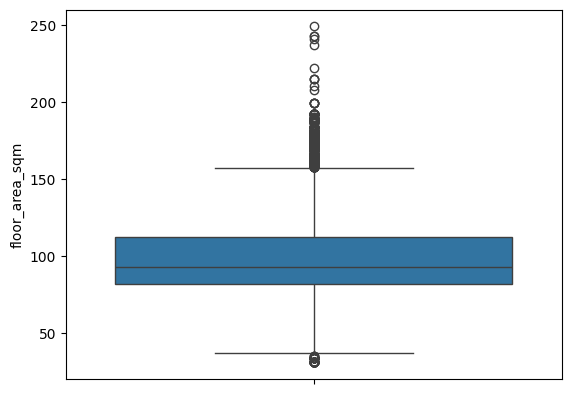

In [9]:
# Outlier analysis on 'floor_area_sqm'

sns.boxplot(y='floor_area_sqm', data=hdb_df)

In [10]:
hdb_df_above_186 = hdb_df[hdb_df['floor_area_sqm'] > 186]
hdb_df_above_186

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
2187,2017-02,WOODLANDS,EXECUTIVE,10 TO 12,192.0,1994,75 years 11 months,760000.0
4060,2017-03,WOODLANDS,EXECUTIVE,07 TO 09,189.0,1994,76 years 01 month,800000.0
5890,2017-04,WOODLANDS,EXECUTIVE,07 TO 09,192.0,1994,75 years 09 months,729000.0
7854,2017-05,WOODLANDS,EXECUTIVE,10 TO 12,189.0,1994,75 years 08 months,765000.0
8868,2017-06,KALLANG/WHAMPOA,3 ROOM,01 TO 03,215.0,1972,54 years 01 month,830000.0
...,...,...,...,...,...,...,...,...
169006,2023-12,WOODLANDS,EXECUTIVE,04 TO 06,192.0,1994,69 years 02 months,1038000.0
171559,2024-01,WOODLANDS,EXECUTIVE,04 TO 06,192.0,1994,69 years 02 months,930000.0
172801,2024-02,KALLANG/WHAMPOA,3 ROOM,01 TO 03,208.0,1972,47 years 06 months,1280000.0
175798,2024-03,WOODLANDS,EXECUTIVE,04 TO 06,189.0,1994,69 years 03 months,980000.0


In [11]:
hdb_df_below_90 = hdb_df[hdb_df['floor_area_sqm'] < 45]
hdb_df_below_90

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
195,2017-01,BUKIT MERAH,2 ROOM,07 TO 09,34.0,1971,53 years 06 months,218000.0
196,2017-01,BUKIT MERAH,2 ROOM,07 TO 09,34.0,1971,53 years 06 months,230000.0
383,2017-01,GEYLANG,2 ROOM,07 TO 09,42.0,1971,53 years,205000.0
384,2017-01,GEYLANG,2 ROOM,10 TO 12,42.0,1971,53 years,215000.0
...,...,...,...,...,...,...,...,...
180896,2024-06,BUKIT MERAH,2 ROOM,07 TO 09,43.0,1970,44 years 10 months,250000.0
181013,2024-06,JURONG WEST,2 ROOM,10 TO 12,38.0,2019,94 years,330000.0
181065,2024-06,PUNGGOL,2 ROOM,19 TO 21,38.0,2018,93 years 06 months,332000.0
181102,2024-06,SEMBAWANG,2 ROOM,07 TO 09,38.0,2019,94 years,327000.0


In [12]:
# removing outliers by dropping the impacted rows

hdb_df = hdb_df.drop(index=hdb_df_above_186.index)
hdb_df

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


In [13]:
# removing outliers by dropping the impacted rows

hdb_df = hdb_df.drop(index=hdb_df_below_90.index)
hdb_df

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,63 years,275000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0
